In [ ]:
# importing necessay libraries

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# setting visualization theme
sns.set()


In [ ]:
# loading the dataset
df= pd.read_csv(r"C:\Users\User\Downloads\Jewelry_Dataset (1).csv")

In [82]:
# a peek at the data
df.head(2)

,Category,Brand_ID,Price_USD,Target_Gender,Main_Color,Main_Metal,Main_Gem
1,jewelry.pendant,1.0,54.66,f,white,gold,sapphire
2,jewelry.pendant,0.0,88.90,f,red,gold,diamond


In [4]:
# setting up the columns for the data
df.columns= ['Order_Datetime', 
               'Order_ID', 
               'Product_ID', 
               'SKU_Quantity',
               'Category_ID',
               'Category', 
               'Brand_ID', 
               'Price_USD',
               'User_ID', 
               'Target_Gender',
               'Main_Color', 
               'Main_Metal',
               'Main_Gem']

In [5]:
df.head(2)

,Order_Datetime,Order_ID,Product_ID,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
0,2018-12-01 17:38:31 UTC,1924899396621697920,1806829193678291446,1,1.806829e+18,NaN,NaN,212.14,1.515916e+18,NaN,yellow,gold,NaN
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,jewelry.pendant,1.0,54.66,1.515916e+18,f,white,gold,sapphire


In [6]:
# checking for missing values

df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        Order_Datetime  Order_ID  Product_ID  SKU_Quantity  Category_ID  \
0               False     False       False         False        False   
1               False     False       False         False        False   
2               False     False       False         False        False   
3               False     False       False         False        False   
4               False     False       False         False        False   
...               ...       ...         ...           ...          ...   
95905           False     False       False         False         True   
95906           False     False       False         False        False   
95907           False     False       False         False        False   
95908           False     False       False         False        False   
95909           False     False       False         False        False   

       Category  Brand_ID  Price_USD  User_ID  Ta

In [7]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Filter out columns with no missing values

print(missing_values)

Category_ID       5352
Category          9933
Brand_ID          4785
Price_USD         5352
User_ID           5352
Target_Gender    48167
Main_Color        7660
Main_Metal        5462
Main_Gem         34058
dtype: int64


In [8]:
df.shape

(95910, 13)

In [9]:
# feature cardinality (i.e no of unique values a column can take)

df.nunique()

Order_Datetime    74504
Order_ID          74759
Product_ID         9613
SKU_Quantity          1
Category_ID          25
Category            218
Brand_ID           2537
Price_USD          3166
User_ID           31079
Target_Gender         2
Main_Color            5
Main_Metal            3
Main_Gem             30
dtype: int64

In [10]:
# data description

df.describe()

,Order_ID,Product_ID,SKU_Quantity,Category_ID,Brand_ID,Price_USD,User_ID
count,9.591000e+04,9.591000e+04,95910.0,9.055800e+04,9.112500e+04,90558.000000,9.055800e+04
mean,2.485191e+18,1.815970e+18,1.0,1.805947e+18,8.891036e+16,362.213017,1.512644e+18
std,1.934750e+17,2.136814e+17,0.0,2.083954e+16,3.559651e+17,444.157665,2.374776e+16
min,1.924899e+18,1.313551e+18,1.0,1.313678e+18,0.000000e+00,0.990000,1.313554e+18
25%,2.379732e+18,1.515966e+18,1.0,1.806829e+18,0.000000e+00,145.620000,1.515916e+18
50%,2.524282e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,258.770000,1.515916e+18
75%,2.644347e+18,1.956664e+18,1.0,1.806829e+18,1.000000e+00,431.370000,1.515916e+18
max,2.719022e+18,2.541962e+18,1.0,1.806829e+18,1.550613e+18,34448.600000,1.554297e+18


In [11]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95910 entries, 0 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_Datetime  95910 non-null  object 
 1   Order_ID        95910 non-null  int64  
 2   Product_ID      95910 non-null  int64  
 3   SKU_Quantity    95910 non-null  int64  
 4   Category_ID     90558 non-null  float64
 5   Category        85977 non-null  object 
 6   Brand_ID        91125 non-null  float64
 7   Price_USD       90558 non-null  float64
 8   User_ID         90558 non-null  float64
 9   Target_Gender   47743 non-null  object 
 10  Main_Color      88250 non-null  object 
 11  Main_Metal      90448 non-null  object 
 12  Main_Gem        61852 non-null  object 
dtypes: float64(4), int64(3), object(6)
memory usage: 9.5+ MB


In [12]:
# Duplicate values

num_duplicates= len(df.loc[df.duplicated()])
print (f"Number of duplicate records:", num_duplicates)

Number of duplicate records: 2589


In [13]:
# features with a cardinality of 1 (invariant feature)

invariant_features= df.nunique()[df.nunique()==1].index.tolist()
invariant_features

['SKU_Quantity']

In [14]:
# checking for label distribution

df['Price_USD'].skew()

18.95906072625981

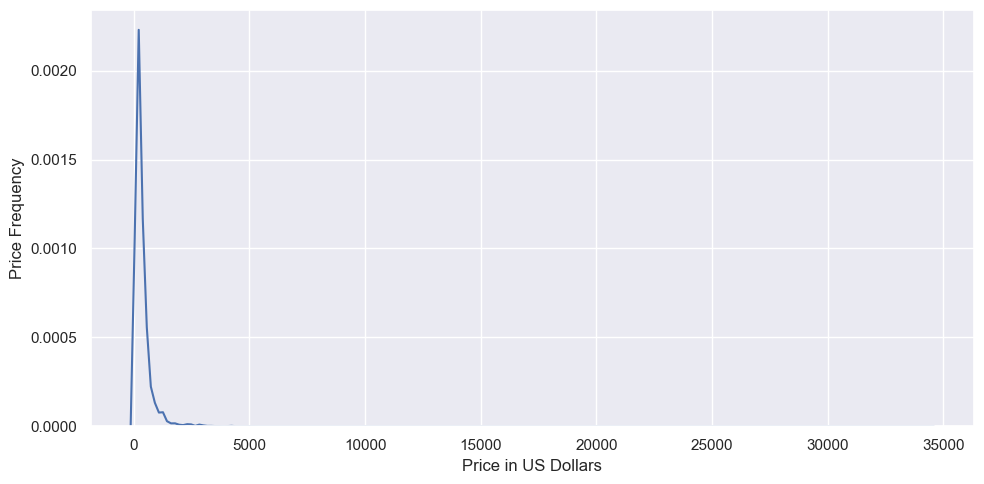

In [15]:
# Visualize price distribution

plt.figure(figsize=(10,5))

sns.kdeplot(data= df, x= 'Price_USD')

plt.xlabel('Price in US Dollars')
plt.ylabel('Price Frequency')

plt.tight_layout()
plt.show(); plt.close()            

            

In [16]:
# price kurtosis
df['Price_USD'].kurtosis()

1054.8979068506155

In [17]:
# Target Gender Analysis
df['Target_Gender'].value_counts(normalize= True)

Target_Gender
f    0.992376
m    0.007624
Name: proportion, dtype: float64

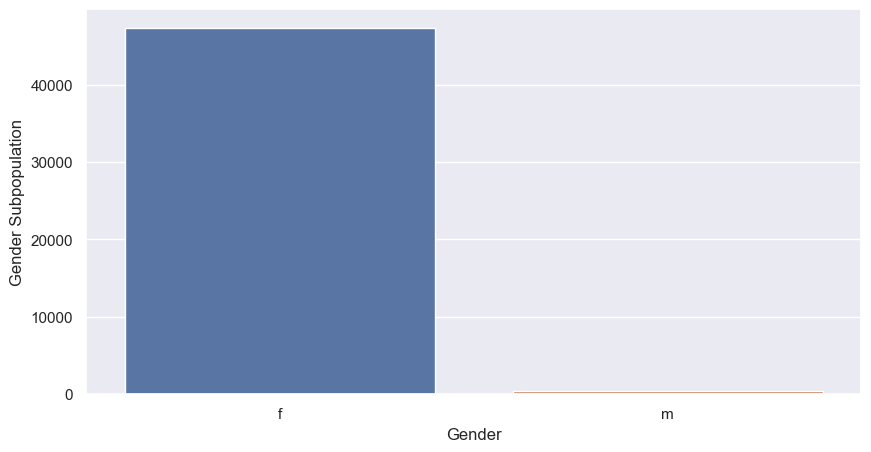

In [18]:
# visualize Target Gender
plt.figure(figsize=(10,5))

sns.countplot(data= df, x= 'Target_Gender')

plt.xlabel('Gender')
plt.ylabel('Gender Subpopulation')

plt.show(); plt.close()

In [19]:
# Jewelry Category analysis
df['Category'].value_counts()

Category
jewelry.earring     29051
jewelry.ring        28300
jewelry.pendant     13088
jewelry.bracelet     6188
0.00                 4392
                    ...  
626.58                  1
13.42                   1
2.88                    1
101.23                  1
253.77                  1
Name: count, Length: 218, dtype: int64

In [20]:
df['Category'].unique()

array([nan, 'jewelry.pendant', 'jewelry.necklace', 'jewelry.earring',
       'jewelry.ring', 'jewelry.brooch', 'jewelry.bracelet',
       'electronics.clocks', 'jewelry.souvenir', '230.12', '202.36',
       '1098.03', '321.78', '1128.62', '81.27', '34.25', '582.16',
       '227.37', '234.22', '150.55', '131.82', '2123.15', '109.45',
       '49.22', '472.47', '205.38', '2746.44', '51.08', '231.12', '76.97',
       '3054.73', '184.90', '380.10', '357.49', '15.47', '135.33',
       '719.75', '93.01', '177.95', 'jewelry.stud', '102.10', '595.75',
       '469.56', '427.07', '53.62', '77.53', '1469.18', '355.27',
       '184.89', '154.66', '300.58', '83.73', '271.19', '3294.21',
       '278.04', '3626.26', '126.03', '283.52', '114.38', '89.04', '8.22',
       '124.88', '89.73', '171.23', '136.93', '19.04', '158.77', '187.10',
       '151.92', '1845.89', '87.23', '248.58', '596.48', '208.88',
       '193.11', '169.84', '1447.68', '45.07', '136.85', '282.05',
       '61.51', '210.21', '137.12'

In [21]:
# Extracting the actual categories
categories= df['Category'].unique().tolist()
categories= [c for c in categories if isinstance(c, str) and 'jewelry' in c]
categories

['jewelry.pendant',
 'jewelry.necklace',
 'jewelry.earring',
 'jewelry.ring',
 'jewelry.brooch',
 'jewelry.bracelet',
 'jewelry.souvenir',
 'jewelry.stud']

In [22]:
# Picking out authentic data based on the categories

real_categories= df.loc[df['Category'].isin(categories)]

In [23]:
# Percentage of missing values

100*df.isnull().sum()/len(df)

Order_Datetime     0.000000
Order_ID           0.000000
Product_ID         0.000000
SKU_Quantity       0.000000
Category_ID        5.580231
Category          10.356584
Brand_ID           4.989052
Price_USD          5.580231
User_ID            5.580231
Target_Gender     50.221041
Main_Color         7.986654
Main_Metal         5.694922
Main_Gem          35.510374
dtype: float64

In [24]:
100*real_categories.isnull().sum()/len(real_categories)

Order_Datetime     0.000000
Order_ID           0.000000
Product_ID         0.000000
SKU_Quantity       0.000000
Category_ID        0.000000
Category           0.000000
Brand_ID           4.309081
Price_USD          0.000000
User_ID            0.000000
Target_Gender     44.842029
Main_Color         2.656044
Main_Metal         0.110617
Main_Gem          24.232519
dtype: float64

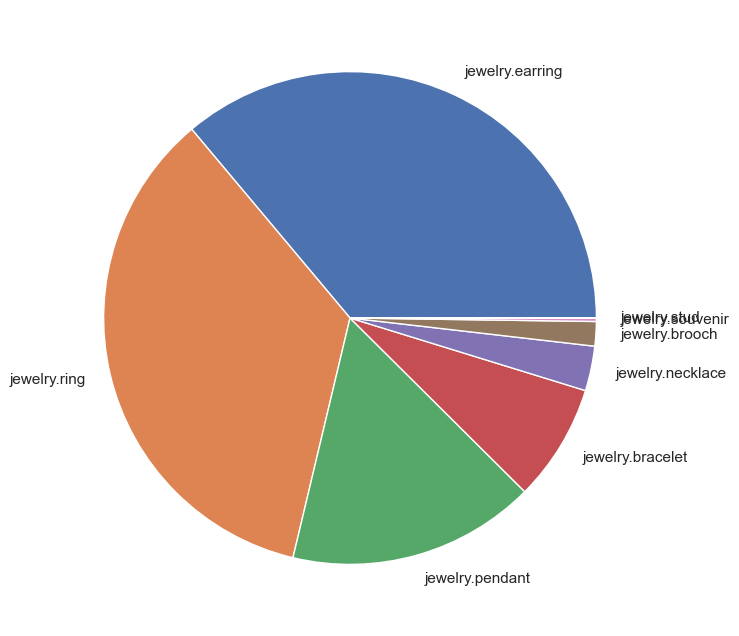

In [25]:
# Visualizing jewelry category

subdata= real_categories['Category'].value_counts()

jewelry_categories, counts= subdata.index.tolist(), subdata.values.tolist()

plt.figure(figsize=(12,8))

plt.pie(x= counts, labels= jewelry_categories)
plt.show(); plt.close()

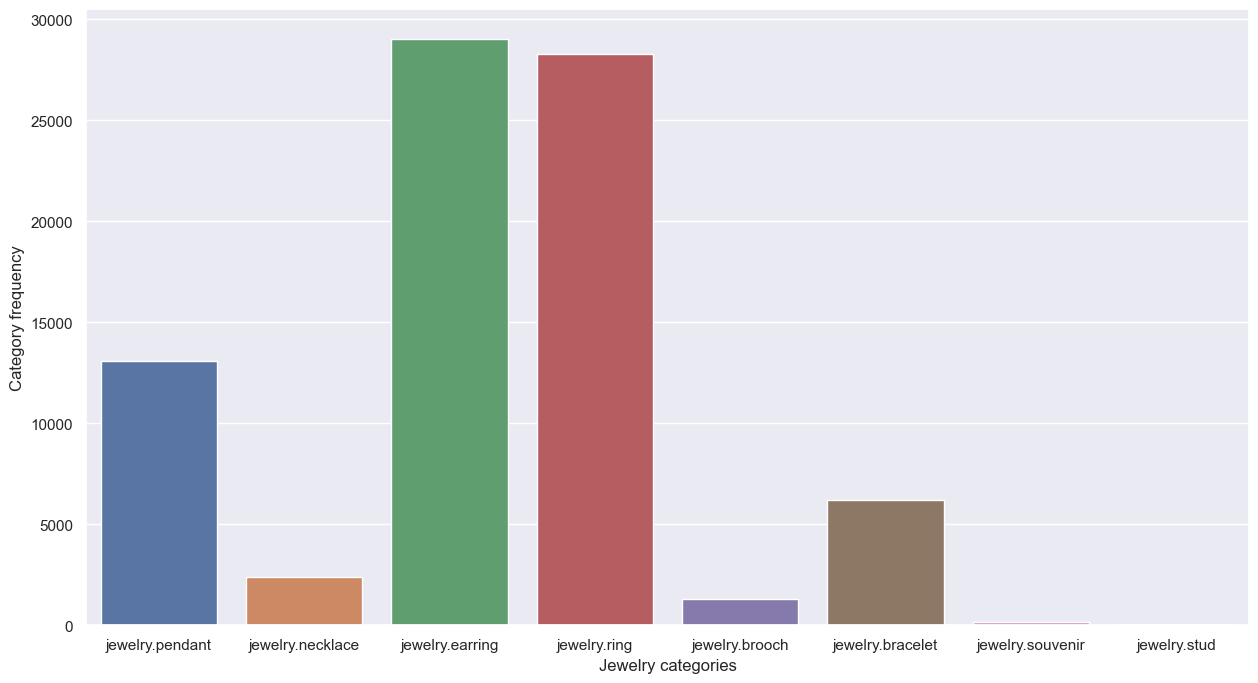

In [26]:
# Category count plot

plt.figure(figsize=(15,8))

sns.countplot(data=real_categories, x= 'Category')
plt.xlabel('Jewelry categories')
plt.ylabel('Category frequency')
plt.show(); plt.close()

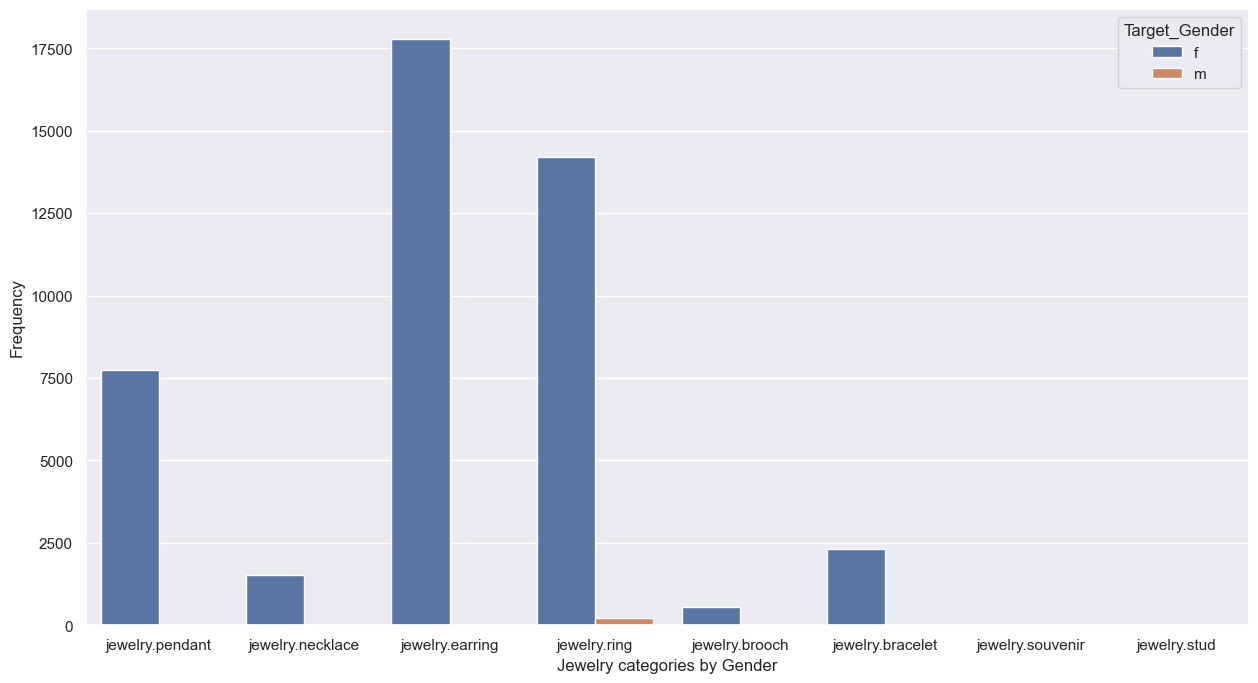

In [27]:
# Breaking down the jewelry category by Gender

plt.figure(figsize=(15,8))
sns.countplot(data=real_categories, x= 'Category', hue= 'Target_Gender')
plt.xlabel('Jewelry categories by Gender')
plt.ylabel('Frequency')
plt.show(); plt.close()

In [28]:
# Gender skew in original data

df['Target_Gender'].value_counts(normalize= True)

Target_Gender
f    0.992376
m    0.007624
Name: proportion, dtype: float64

In [29]:
real_categories['Target_Gender'].value_counts(normalize= True)

Target_Gender
f    0.994434
m    0.005566
Name: proportion, dtype: float64

In [30]:
# Encoding the jewelry categories

encoded, category_code= pd.factorize(real_categories['Category'])
real_categories.loc[:, 'Category']= encoded

In [31]:
# Encoding the Gender

encoded, category_code= pd.factorize(real_categories['Target_Gender'])
real_categories.loc[:, 'Target_Gender']= encoded

In [32]:
# Encoding Main Gem

encoded, category_code= pd.factorize(real_categories['Main_Gem'])
real_categories.loc[:, 'Main_Gem']= encoded

In [33]:
# Encoding Main Color

encoded, category_code= pd.factorize(real_categories['Main_Color'])
real_categories.loc[:, 'Main_Color']= encoded

In [34]:
# Encoding Main Metal

# Factorize the 'Main_Metal' column
encoded, category_code = pd.factorize(real_categories['Main_Metal'])

# Make a copy of the DataFrame before modification to avoid SettingWithCopyWarning
real_categories = real_categories.copy()

# Assign the encoded values to the DataFrame
real_categories['Main_Metal'] = encoded


In [35]:
real_categories.head()

,Order_Datetime,Order_ID,Product_ID,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,User_ID,Target_Gender,Main_Color,Main_Metal,Main_Gem
1,2018-12-02 13:53:42 UTC,1925511016616034733,1842214461889315556,1,1.806829e+18,0,1.0,54.66,1.515916e+18,0,0,0,0
2,2018-12-02 17:44:02 UTC,1925626951238681511,1835566849434059453,1,1.806829e+18,0,0.0,88.90,1.515916e+18,0,1,0,1
3,2018-12-02 21:30:19 UTC,1925740842841014667,1873936840742928865,1,1.806829e+18,1,0.0,417.67,1.515916e+18,-1,1,0,2
4,2018-12-02 22:09:34 UTC,1925760595336888995,1835566854827934449,1,1.806829e+18,2,1.0,102.27,1.515916e+18,-1,1,0,-1
5,2018-12-02 22:09:34 UTC,1925760595336888995,1600021442638905547,1,1.806829e+18,2,0.0,150.55,1.515916e+18,-1,1,0,1


In [36]:
real_categories.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80458 entries, 1 to 95909
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_Datetime  80458 non-null  object 
 1   Order_ID        80458 non-null  int64  
 2   Product_ID      80458 non-null  int64  
 3   SKU_Quantity    80458 non-null  int64  
 4   Category_ID     80458 non-null  float64
 5   Category        80458 non-null  object 
 6   Brand_ID        76991 non-null  float64
 7   Price_USD       80458 non-null  float64
 8   User_ID         80458 non-null  float64
 9   Target_Gender   80458 non-null  object 
 10  Main_Color      80458 non-null  object 
 11  Main_Metal      80458 non-null  int64  
 12  Main_Gem        80458 non-null  object 
dtypes: float64(4), int64(4), object(5)
memory usage: 8.6+ MB


In [37]:
# Feature correlatiion

correlations= real_categories.drop(labels=['Order_Datetime', 'User_ID', 'Product_ID'],axis= 1).corr(method= 'spearman')

In [38]:
correlations

,Order_ID,SKU_Quantity,Category_ID,Category,Brand_ID,Price_USD,Target_Gender,Main_Color,Main_Metal,Main_Gem
Order_ID,1.000000,NaN,0.009364,-0.024714,0.004214,0.055031,-0.010814,0.018447,-0.038268,0.004135
SKU_Quantity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category_ID,0.009364,NaN,1.000000,-0.886212,0.111328,-0.296495,0.106286,0.003396,0.157834,0.050483
Category,-0.024714,NaN,-0.886212,1.000000,-0.111680,0.267257,-0.124101,-0.059402,0.105056,-0.082944
Brand_ID,0.004214,NaN,0.111328,-0.111680,1.000000,-0.018428,0.623701,0.100816,0.003835,0.076277
Price_USD,0.055031,NaN,-0.296495,0.267257,-0.018428,1.000000,0.049532,0.013177,-0.173050,-0.006630
Target_Gender,-0.010814,NaN,0.106286,-0.124101,0.623701,0.049532,1.000000,0.056950,-0.046436,0.166125
Main_Color,0.018447,NaN,0.003396,-0.059402,0.100816,0.013177,0.056950,1.000000,-0.238080,0.136232
Main_Metal,-0.038268,NaN,0.157834,0.105056,0.003835,-0.173050,-0.046436,-0.238080,1.000000,-0.055603
Main_Gem,0.004135,NaN,0.050483,-0.082944,0.076277,-0.006630,0.166125,0.136232,-0.055603,1.000000


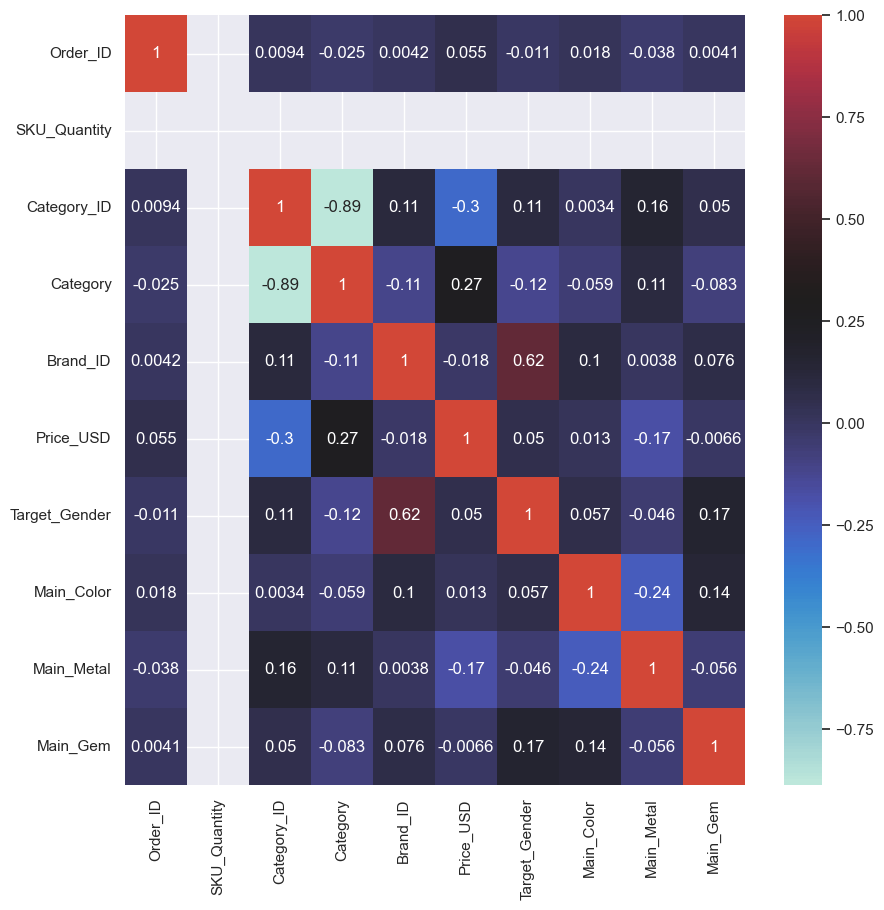

In [39]:
# Correlation heatmap

plt.figure(figsize=(10,10))
sns.heatmap(correlations, annot= True, center= .3)
plt.show(); plt.close()


In [40]:
# Setting correlation limits
upper= 1
lower= .2

In [41]:
correlated_columns={column:correlations[(correlations[column]>lower) & (upper>correlations[column])].index.tolist
                   for column in correlations.columns}

In [42]:
correlated_columns

{'Order_ID': <bound method IndexOpsMixin.tolist of Index([], dtype='object')>,
 'SKU_Quantity': <bound method IndexOpsMixin.tolist of Index([], dtype='object')>,
 'Category_ID': <bound method IndexOpsMixin.tolist of Index([], dtype='object')>,
 'Category': <bound method IndexOpsMixin.tolist of Index(['Price_USD'], dtype='object')>,
 'Brand_ID': <bound method IndexOpsMixin.tolist of Index(['Target_Gender'], dtype='object')>,
 'Price_USD': <bound method IndexOpsMixin.tolist of Index(['Category'], dtype='object')>,
 'Target_Gender': <bound method IndexOpsMixin.tolist of Index(['Brand_ID'], dtype='object')>,
 'Main_Color': <bound method IndexOpsMixin.tolist of Index([], dtype='object')>,
 'Main_Metal': <bound method IndexOpsMixin.tolist of Index([], dtype='object')>,
 'Main_Gem': <bound method IndexOpsMixin.tolist of Index([], dtype='object')>}

## Data Implications

Implied by the findings above, we can say the following:

1. Missing Values

In [45]:
# Columns to eliminate
columns_to_eliminate= [
    'SKU_Quantity',
    'Order_ID',
    'Product_ID',
    'User_ID',
    'Category_ID',
]

In [46]:
df.columns

Index(['Order_Datetime', 'Order_ID', 'Product_ID', 'SKU_Quantity',
       'Category_ID', 'Category', 'Brand_ID', 'Price_USD', 'User_ID',
       'Target_Gender', 'Main_Color', 'Main_Metal', 'Main_Gem'],
      dtype='object')

In [47]:
# Eliminate unused features
df.drop(labels= columns_to_eliminate, axis= 1, inplace= True, errors= 'ignore')

In [48]:
# Eliminate unused features
df.drop(labels= ['Order_Datetime'], axis= 1, inplace= True)

In [49]:
df.shape

(95910, 7)

In [50]:
df.head()

,Category,Brand_ID,Price_USD,Target_Gender,Main_Color,Main_Metal,Main_Gem
0,NaN,NaN,212.14,NaN,yellow,gold,NaN
1,jewelry.pendant,1.0,54.66,f,white,gold,sapphire
2,jewelry.pendant,0.0,88.90,f,red,gold,diamond
3,jewelry.necklace,0.0,417.67,NaN,red,gold,amethyst
4,jewelry.earring,1.0,102.27,NaN,red,gold,NaN


In [51]:
# Eliminating unrealiatic categories
df = df.loc [df['Category'].isin(categories), :]

In [52]:
df.shape

(80458, 7)

In [53]:
df.head()

,Category,Brand_ID,Price_USD,Target_Gender,Main_Color,Main_Metal,Main_Gem
1,jewelry.pendant,1.0,54.66,f,white,gold,sapphire
2,jewelry.pendant,0.0,88.90,f,red,gold,diamond
3,jewelry.necklace,0.0,417.67,NaN,red,gold,amethyst
4,jewelry.earring,1.0,102.27,NaN,red,gold,NaN
5,jewelry.earring,0.0,150.55,NaN,red,gold,diamond


In [54]:
from sklearn.model_selection import train_test_split

In [84]:
# Separate features from labels


# Convert list to DataFrame
df = pd.DataFrame(df)

# Now separate features from labels
X = df.drop(labels=['Price_USD'], axis=1)
y = df['Price_USD']


In [86]:
# Creating test and train splits
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= .1)

## Data Modelling

   1. Linear Regression
   2. Extremely Random Forest(EXtraTrees)
   3. Adaptive Boosting(AdaBoost), and
   4. Catboost

In [89]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.compose import TransformedTargetRegressor, ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor
!pip install catboost

from catboost import CatBoostRegressor

In [90]:
from sklearn.pipeline import Pipeline

In [91]:
def generate_pipeline (model, column_indices, categorical_indices, fill_missing= True, one_hot= True, label_encode= False):
    first_transformer= ColumnTransformer (
        transformers=[
            ('imputer', SimpleImputer(strategy= 'most_frequent'), column_indices)
        ],
        remainder= 'passthrough',
        sparse_threshold= 0.
    )

    second_transformer= ColumnTransformer(
        transformers= [
            ('one_hot', OneHotEncoder(), categorical_indices)
        ],
        remainder= 'passthrough',
        sparse_threshold= 0.
    )
    third_transformer= ColumnTransformer(
        transformers= [
            ('Ordinal', OrdinalEncoder(), categorical_indices)
        ],
        remainder= 'passthrough',
        sparse_threshold= 0.
    )

    steps= []

    if fill_missing:
        steps.append(('first', first_transformer))

    if label_encode:
        steps.append (('third', third_transformer))

    if one_hot:
        steps.append (('second', second_transformer))
    steps.append(('model', model))    

    model_pipe= Pipeline( steps= steps)

    return model_pipe



In [95]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')


In [97]:
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns


In [99]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


In [101]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

lin_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


In [103]:
#Generating indices
columns= X.columns.tolist()
column_indices= [columns.index(c) for c in columns]
categorical_features= [c for c in columns if c not in ['Brand_ID']]
categorical_indices= [columns.index(c) for c in categorical_features]

In [105]:
categorical_indices

[0, 2, 3, 4, 5]

In [107]:
# CatBoost Pipiline
cat_pipe= generate_pipeline(
    CatBoostRegressor(loss_function= 'RMSE', iterations= 10000, learning_rate= 0.1, one_hot_max_size= 2),
    column_indices,
    categorical_indices,
    fill_missing= False, one_hot= False, label_encode= True
)

In [109]:
# Linear Regression Pipeline

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

lin_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


#lin_pipe= generate_pipeline(
 #   LinearRegression(),
#    column_indices,
#    categorical_indices,
#    fill_missing= False, one_hot= False, label_encode= True
#)

In [115]:
# AdaBoost Pipiline

numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns

numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

ada_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', AdaBoostRegressor())
])
from sklearn.ensemble import HistGradientBoostingRegressor

#hgb_regressor = HistGradientBoostingRegressor(categorical_features='auto')

#X_train_clean = X_train.dropna()
#y_train_clean = y_train[X_train_clean.index]



#ada_pipe= generate_pipeline(
 #   AdaBoostRegressor(loss= 'exponential', n_estimators= 1000, learning_rate= .01),
  #  column_indices,
   # categorical_indices,
    #fill_missing= False, one_hot= False, label_encode= True
#)

In [117]:
# ExtraTress Pipiline

extra_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('extratrees', ExtraTreesRegressor())
])

hgb_regressor = HistGradientBoostingRegressor(categorical_features='auto')

ExtraTreesRegressor(max_depth=5, max_samples=0.1)

#extra_pipe= generate_pipeline(
 #   ExtraTreesRegressor(criterion= 'friedman_mse', n_estimators= 1000, bootstrap= True),
  #  column_indices,
  #  categorical_indices,
  #  fill_missing= False, one_hot= False, label_encode= True
#)

ExtraTreesRegressor(max_depth=5, max_samples=0.1)

In [119]:
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns

numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

extra_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', ExtraTreesRegressor())
])

In [121]:
# Transform targets

from sklearn.preprocessing import PowerTransformer

cat_pipe= TransformedTargetRegressor(regressor= cat_pipe, transformer= PowerTransformer(method= 'box-cox'))
ada_pipe= TransformedTargetRegressor(regressor= ada_pipe, transformer= PowerTransformer(method= 'box-cox'))
lin_pipe= TransformedTargetRegressor(regressor= lin_pipe, transformer= PowerTransformer(method= 'box-cox'))
extra_pipe= TransformedTargetRegressor(regressor= extra_pipe, transformer= PowerTransformer(method= 'box-cox'))

In [123]:
# Fit CatBoost
cat_model= cat_pipe.fit(X_train, y_train)

0:	learn: 0.9626414	total: 154ms	remaining: 25m 41s
1:	learn: 0.9242554	total: 170ms	remaining: 14m 7s
2:	learn: 0.8973246	total: 184ms	remaining: 10m 14s
3:	learn: 0.8696204	total: 199ms	remaining: 8m 18s
4:	learn: 0.8502225	total: 216ms	remaining: 7m 11s
5:	learn: 0.8337115	total: 233ms	remaining: 6m 27s
6:	learn: 0.8150712	total: 251ms	remaining: 5m 58s
7:	learn: 0.7991457	total: 267ms	remaining: 5m 33s
8:	learn: 0.7888492	total: 283ms	remaining: 5m 14s
9:	learn: 0.7790836	total: 299ms	remaining: 4m 59s
10:	learn: 0.7713777	total: 315ms	remaining: 4m 45s
11:	learn: 0.7611367	total: 330ms	remaining: 4m 34s
12:	learn: 0.7552405	total: 345ms	remaining: 4m 25s
13:	learn: 0.7478170	total: 363ms	remaining: 4m 18s
14:	learn: 0.7405672	total: 386ms	remaining: 4m 16s
15:	learn: 0.7354629	total: 421ms	remaining: 4m 22s
16:	learn: 0.7314621	total: 443ms	remaining: 4m 20s
17:	learn: 0.7280311	total: 464ms	remaining: 4m 17s
18:	learn: 0.7242916	total: 484ms	remaining: 4m 14s
19:	learn: 0.7192787

In [132]:
# Fit Linear Regression
lin_pipe.fit(X_train, y_train)


TransformedTargetRegressor(regressor=Pipeline(steps=[('preprocessor',
                                                      ColumnTransformer(transformers=[('num',
                                                                                       SimpleImputer(),
                                                                                       Index(['Brand_ID'], dtype='object')),
                                                                                      ('cat',
                                                                                       OneHotEncoder(handle_unknown='ignore'),
                                                                                       Index(['Category', 'Target_Gender', 'Main_Color', 'Main_Metal', 'Main_Gem'], dtype='object'))])),
                                                     ('regressor',
                                                      LinearRegression())]),
                           transformer=PowerTransformer(method='box-cox'))

In [134]:
# Fit AdaBoost
ada_pipe.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('preprocessor',
                                                      ColumnTransformer(transformers=[('num',
                                                                                       SimpleImputer(),
                                                                                       Index(['Brand_ID'], dtype='object')),
                                                                                      ('cat',
                                                                                       Pipeline(steps=[('imputer',
                                                                                                        SimpleImputer(strategy='most_frequent')),
                                                                                                       ('onehot',
                                                                                                        OneHotEncoder(handle_unknown='ignore'))]),
                                                                                       Index(['Category', 'Target_Gender', 'Main_Color', 'Main_Metal', 'Main_Gem'], dtype='object'))])),
                                                     ('regressor',
                                                      AdaBoostRegressor())]),
                           transformer=PowerTransformer(method='box-cox'))

In [136]:
# Fit ExtraTrees
extra_pipe.fit(X_train, y_train)

TransformedTargetRegressor(regressor=Pipeline(steps=[('preprocessor',
                                                      ColumnTransformer(transformers=[('num',
                                                                                       SimpleImputer(),
                                                                                       Index(['Brand_ID'], dtype='object')),
                                                                                      ('cat',
                                                                                       Pipeline(steps=[('imputer',
                                                                                                        SimpleImputer(strategy='most_frequent')),
                                                                                                       ('onehot',
                                                                                                        OneHotEncoder(handle_unknown='ignore'))]),
                                                                                       Index(['Category', 'Target_Gender', 'Main_Color', 'Main_Metal', 'Main_Gem'], dtype='object'))])),
                                                     ('regressor',
                                                      ExtraTreesRegressor())]),
                           transformer=PowerTransformer(method='box-cox'))

## Model Evaluation

1. R2
2. RMSE (Root Mean Square Error)


In [139]:
from sklearn.metrics import r2_score, mean_squared_error

In [141]:
def root_mean_squared_error(y_true, y_pred):
    value= mean_squared_error(y_true, y_pred)
    return np.sqrt(value)

In [143]:
def generate_model_score(model, data, metric_function):
    X, y= data
    y= model.predict(X)
    score= metric_function(y, y)
    return score

In [145]:
def print_metrics(metric_name, train_score, test_score):
    print(f'Train {metric_name}= {train_score}')
    print(f'Test {metric_name}= {test_score}')
    print(f'Generalisation error= {train_score- test_score}')

    return

In [147]:
def test_model(model, data, metric_name, metric_function):
    train, test= data

    if isinstance(metric_name, str): # single metric
        train_score= generate_model_score(model, train, metric_function)
        test_score= generate_model_score(model, test, metric_function)
        print_metrics(metric_name, train_score, test_score)

    else: # multiple metrics
        for name, function in zip(metric_name, metric_function):
            train_score=  generate_model_score(model, train, function)
            test_score= generate_model_score(model, test, function)
            print_metrics(name, train_score, test_score)

    return
    

In [149]:
# name and Fubction for metrics

metric_name= ['R2', 'RMSE']
metric_function= [r2_score, root_mean_squared_error]


In [151]:
# Create data variable
data= [
    [X_train, y_train],
    [X_test, y_test]
]

In [153]:
def generate_model_score(model, data, metric_function):
    X, y_true = data
    y_pred = model.predict(X)
    score = metric_function(y_true, y_pred)  # Compare true y with predicted y
    return score


In [155]:
# Test CatBoost
test_model(cat_pipe, data, metric_name, metric_function)

Train R2= 0.32497913335528705
Test R2= 0.34473398133347966
Generalisation error= -0.019754847978192602
Train RMSE= 368.2488142081052
Test RMSE= 291.12300231491326
Generalisation error= 77.12581189319195


In [156]:
# Test LinearRegression
test_model(lin_pipe, data, metric_name, metric_function)

Train R2= 0.1382617252887608
Test R2= 0.21058613619227806
Generalisation error= -0.07232441090351727
Train RMSE= 416.07387671886903
Test RMSE= 319.5362048854641
Generalisation error= 96.53767183340494


In [158]:
# Test AdaBoost
test_model(ada_pipe, data, metric_name, metric_function)

Train R2= 0.0714241694460721
Test R2= 0.07626377268380047
Generalisation error= -0.004839603237728363
Train RMSE= 431.90819625854067
Test RMSE= 345.65407899514975
Generalisation error= 86.25411726339092


In [161]:
# Test ExtraTress
test_model(extra_pipe, data, metric_name, metric_function)

Train R2= 0.23109758819728043
Test R2= 0.20251888829373565
Generalisation error= 0.02857869990354478
Train RMSE= 393.02336485373695
Test RMSE= 321.1647710718196
Generalisation error= 71.85859378191736


## Model Deployment

As observed from the Model Evaluation phase, althought the CatBoost pipeline performed best amongst all models, its scores were still quite bad(R2 score= 0.32). A report will need to be written and presentation be made to the executive team at Gemineye Emporium, detailing tangible reasonsand hypothesis for this. Recommendationsmust also be made as regards possible means forward.

In [164]:
unique_categories = X['Category'].unique()
print("Unique Categories:", unique_categories)


Unique Categories: ['jewelry.pendant' 'jewelry.necklace' 'jewelry.earring' 'jewelry.ring'
 'jewelry.brooch' 'jewelry.bracelet' 'jewelry.souvenir' 'jewelry.stud']


In [166]:
unique_metals = X['Main_Metal'].unique()
print("Unique Metals:", unique_metals)


Unique Metals: ['gold' 'silver' nan 'platinum']


In [168]:
unique_colors = X['Main_Color'].unique()
print("Unique Colors:", unique_colors)


Unique Colors: ['white' 'red' 'yellow' nan 'unknown-color']


In [170]:
unique_gems = X['Main_Gem'].unique()
print("Unique Gems:", unique_gems)


Unique Gems: ['sapphire' 'diamond' 'amethyst' nan 'fianit' 'pearl' 'quartz' 'topaz'
 'garnet' 'quartz_smoky' 'ruby' 'agate' 'mix' 'citrine' 'emerald' 'amber'
 'chrysolite' 'chrysoprase' 'nanocrystal' 'turquoise' 'sitall'
 'corundum_synthetic' 'coral' 'onyx' 'nacre' 'spinel' 'tourmaline'
 'emerald_geothermal' 'garnet_synthetic' 'rhodolite' 'sapphire_geothermal']


In [172]:
unique_genders = X['Target_Gender'].unique()
print("Unique_Gender:", unique_genders)


Unique_Gender: ['f' nan 'm']


In [174]:
pip install pandas joblib


Note: you may need to restart the kernel to use updated packages.


In [175]:
# saving the trained model
import joblib
joblib.dump(cat_model, 'cat_model.joblib')


['cat_model.joblib']